In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
sns.set()
sns.set_context('talk')

import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", 104)
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

In [2]:
eth_df_raw = pd.read_csv('https://raw.githubusercontent.com/alhang/csv-files/master/gemini_ETHUSD_day.csv', skiprows=1)
btc_df_raw = pd.read_csv('https://raw.githubusercontent.com/alhang/csv-files/master/gemini_BTCUSD_day.csv', skiprows=1)
covid_df_raw = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv')
nasdaq_df_raw = pd.read_csv('https://raw.githubusercontent.com/alhang/csv-files/master/NASDAQ_Historical.csv')

In [3]:
eth_df = eth_df_raw.iloc[:749]
eth_df = eth_df.sort_values(by=['Date'], ascending=True)
eth_df = eth_df.reset_index()
eth_df = eth_df.drop(columns=['Unix Timestamp','Symbol','Open','High','Low','Volume','index'])
eth_df

,Date,Close
0,2020-01-21 04:00:00,168.40
1,2020-01-22 04:00:00,164.86
2,2020-01-23 04:00:00,159.13
3,2020-01-24 04:00:00,158.89
4,2020-01-25 04:00:00,161.18
...,...,...
744,2022-02-03 04:00:00,2685.66
745,2022-02-04 04:00:00,3000.46
746,2022-02-05 04:00:00,3011.36
747,2022-02-06 04:00:00,3072.90


In [4]:
btc_df = btc_df_raw.iloc[:749]
btc_df = btc_df.sort_values(by=['Date'], ascending=True)
btc_df = btc_df.reset_index()
btc_df = btc_df.drop(columns=['Unix Timestamp','Symbol','Open','High','Low','Volume','index'])
btc_df

,Date,Close
0,2020-01-21 04:00:00,8697.93
1,2020-01-22 04:00:00,8559.71
2,2020-01-23 04:00:00,8310.20
3,2020-01-24 04:00:00,8286.66
4,2020-01-25 04:00:00,8346.01
...,...,...
744,2022-02-03 04:00:00,37330.90
745,2022-02-04 04:00:00,41487.51
746,2022-02-05 04:00:00,41485.00
747,2022-02-06 04:00:00,42863.79


In [5]:
covid_df = covid_df_raw.drop(columns=['deaths'])
covid_df

,date,cases
0,2020-01-21,1
1,2020-01-22,1
2,2020-01-23,1
3,2020-01-24,2
4,2020-01-25,3
...,...,...
761,2022-02-20,78377937
762,2022-02-21,78433596
763,2022-02-22,78556778
764,2022-02-23,78641256


In [6]:
nasdaq_df_raw['Date'] = pd.to_datetime(nasdaq_df_raw.Date)
nasdaq_df = nasdaq_df_raw.iloc[:521]
nasdaq_df = nasdaq_df.sort_values(by=['Date'], ascending=True)
nasdaq_df = nasdaq_df.reset_index()
nasdaq_df = nasdaq_df.drop(columns=['Volume','Open','High','Low','index'])
nasdaq_df

,Date,Close/Last
0,2020-01-21,9370.81
1,2020-01-22,9383.77
2,2020-01-23,9402.48
3,2020-01-24,9314.91
4,2020-01-27,9139.31
...,...,...
516,2022-02-04,14098.01
517,2022-02-07,14015.67
518,2022-02-08,14194.45
519,2022-02-09,14490.37


In [7]:
##F1: US COVID CASES CORRELATION WITH STOCK PRICES

In [8]:
a = nasdaq_df['Close/Last']
b = covid_df['cases']

In [9]:
cor = nasdaq_df['Close/Last'].corr(covid_df['cases'])
cor

0.8771890388799622

In [10]:
covid_df = covid_df.drop(covid_df.index[521:])

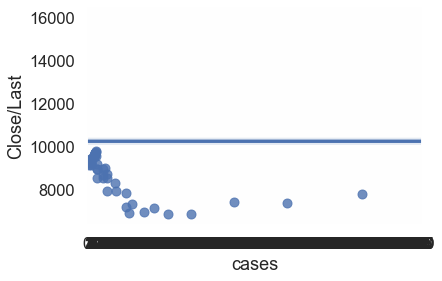

In [11]:
fig, ax = plt.subplots()
sns.regplot(x = covid_df['cases'], y = nasdaq_df['Close/Last'], ax = ax)
ax.set_xlim(0, 521)
ax.set_xticks(range(0, 521))
plt.savefig('COVID_Cases_With_Stock_Prices')

In [12]:
##F2: US COVID CASES CORRELATION WITH STOCK PRICES

In [13]:
#c = btc_df['Close']

In [14]:
cor_2= nasdaq_df['Close/Last'].corr(btc_df['Close'])
cor_2

0.7919355859958763

In [15]:
btc_df = btc_df.drop(btc_df.index[521:])

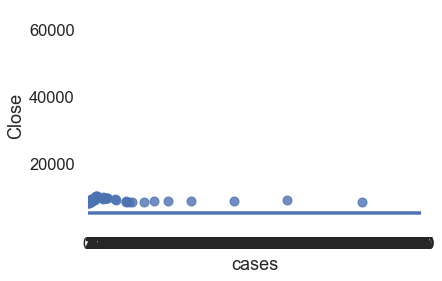

In [17]:
fig, ax = plt.subplots()
sns.regplot(x = covid_df['cases'], y = btc_df['Close'], ax = ax)
ax.set_xlim(0, 521)
ax.set_xticks(range(0, 521))
plt.savefig('Bitcoin_Prices_with_Stock_Prices')